# グラフ等で考察する用

- ファイルの出力は行わない

In [5]:
result_path = r'results/discussion/model=EleutherAI_gpt-neox-20b-input=None-method=vanillaVSBM25-shots=15-n=2000_int8bit.csv'

plot_spop


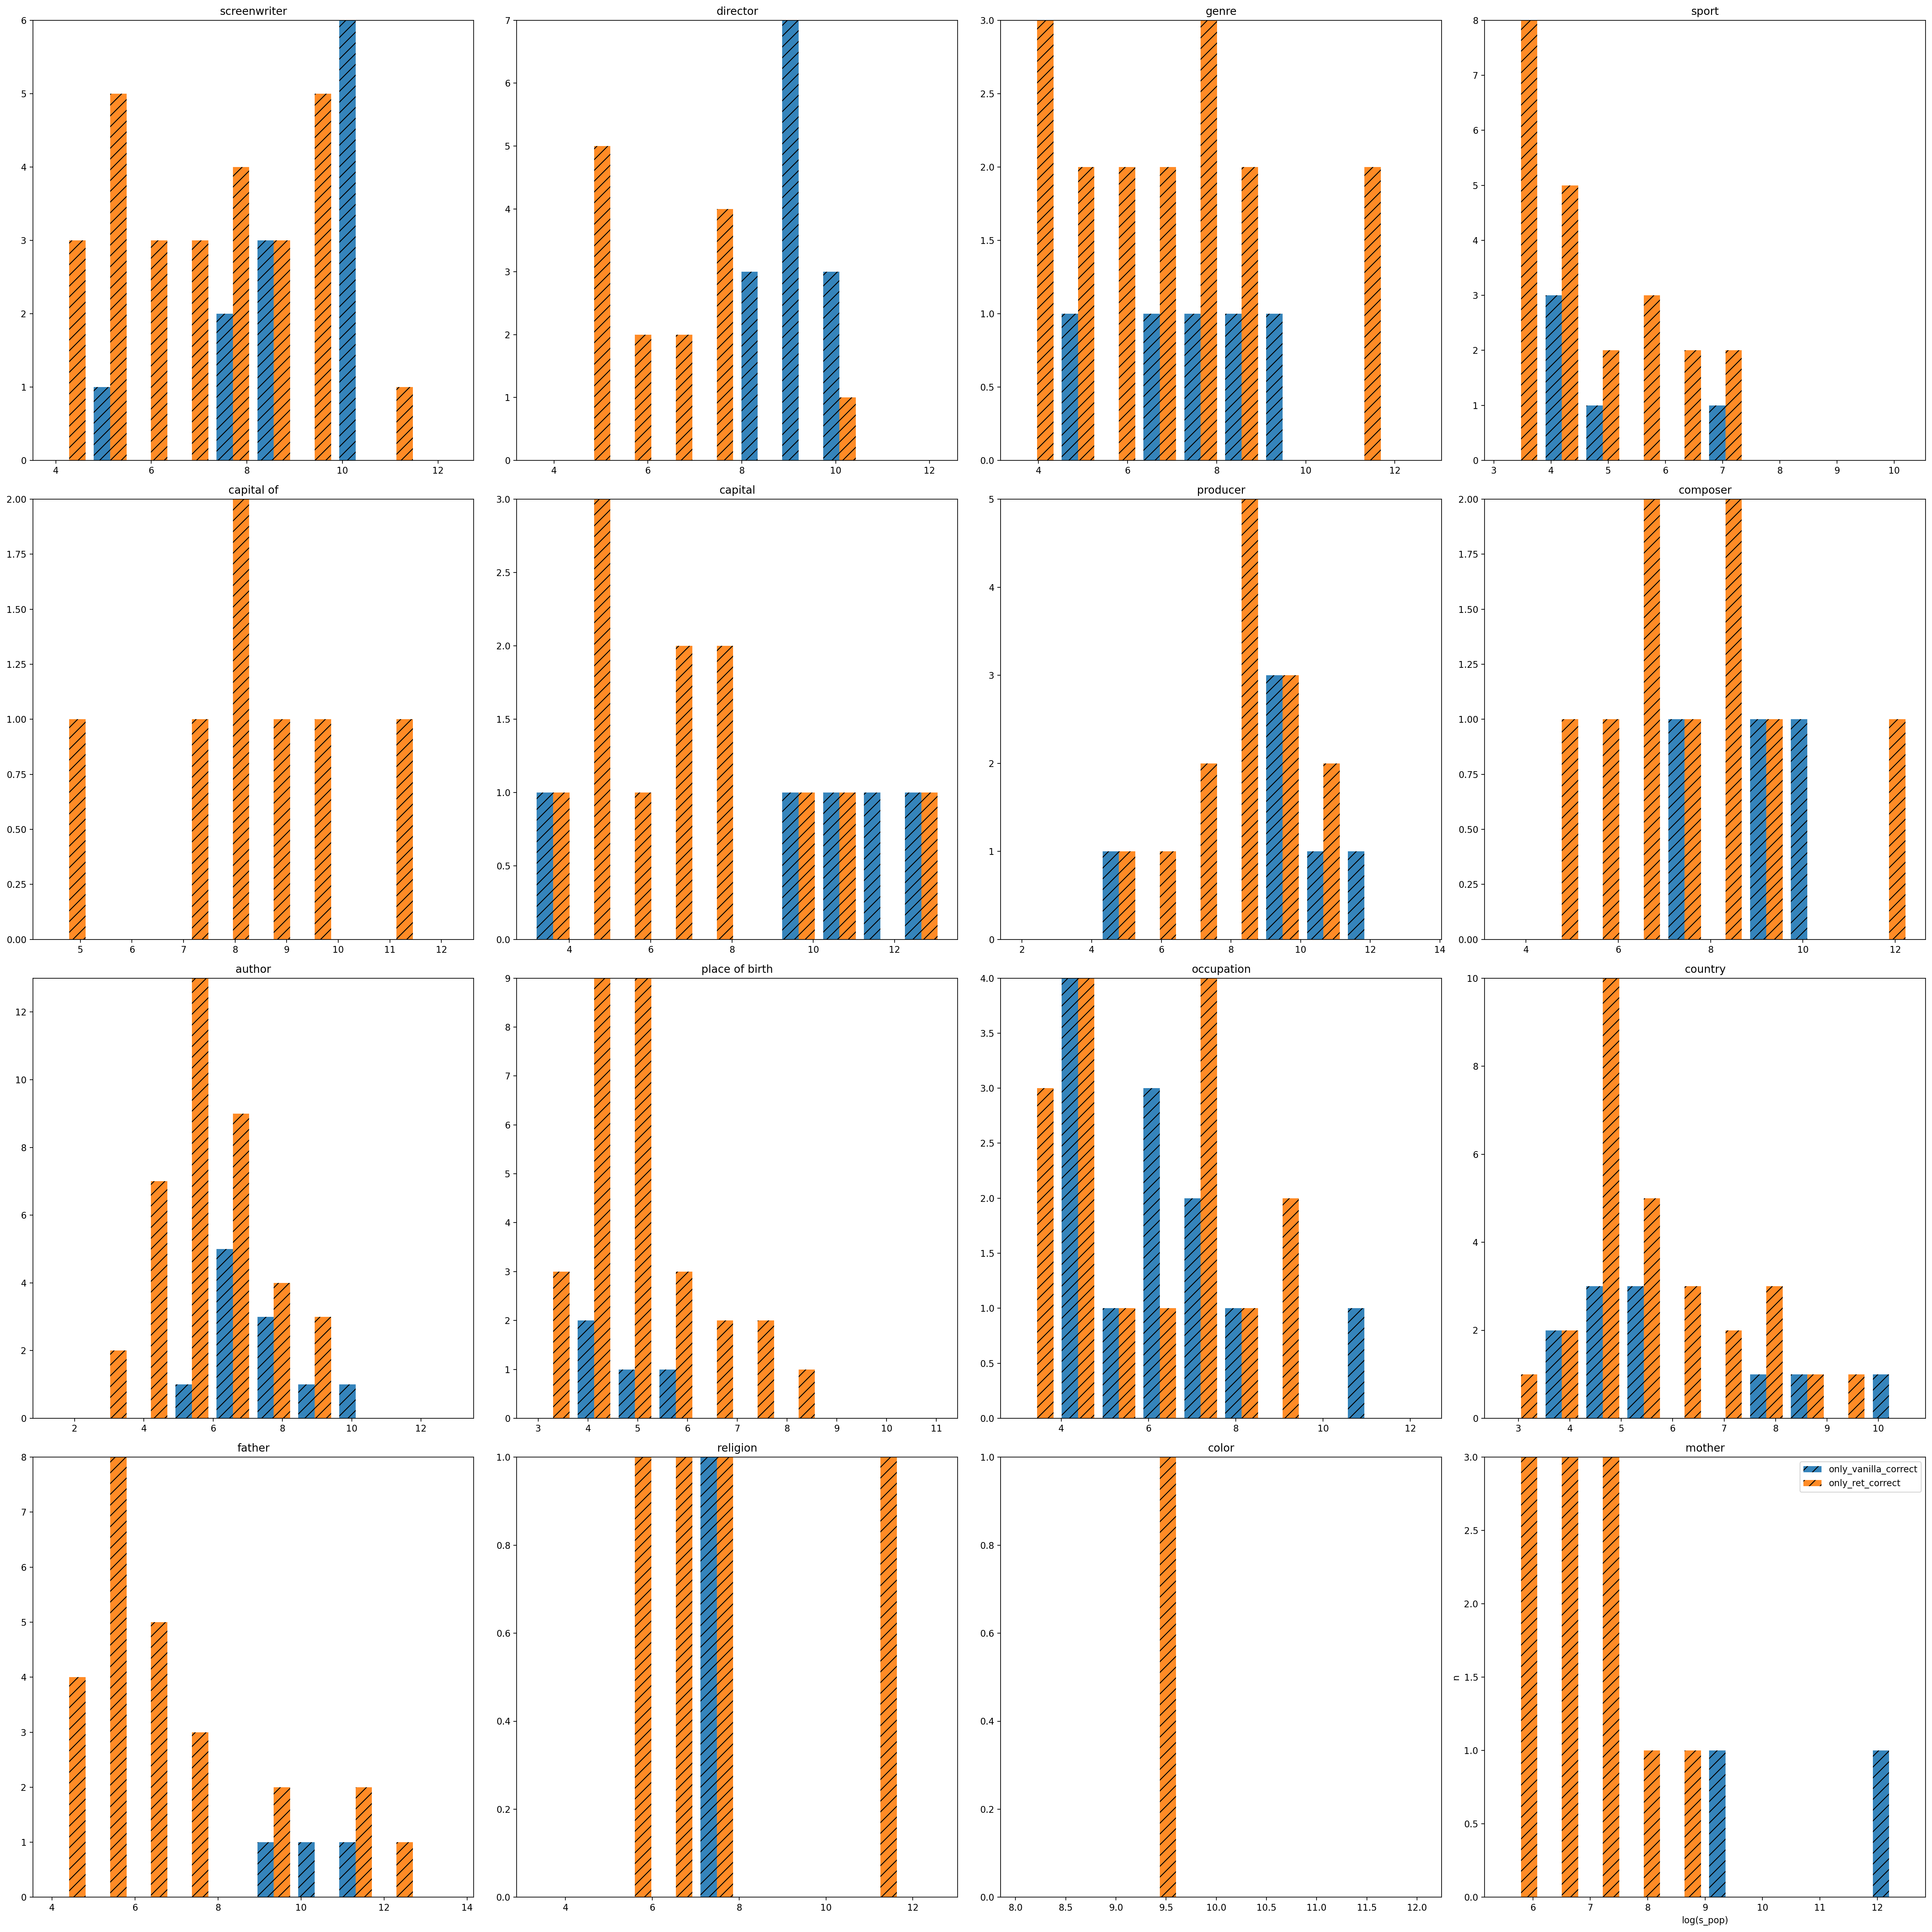

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


print("plot_spop")
result = pd.read_csv(result_path)
props = result.prop.unique()
plt.figure(dpi=200, figsize=(30, 30))
for i, prop in enumerate(props):
    plt.subplot(4, 4, i+1)
    prop_result = result[result.prop == prop].copy() # 特定のpropのみ抽出
    #print(f'{prop} : {len(prop_result)}')

    log_pop = np.log(prop_result["s_pop"].values)
    prop_result["log_pop"] = log_pop
    ser = log_pop
    _, bin_edges = np.histogram(ser) # 人気度の範囲
    width = 0.4*(bin_edges[1] - bin_edges[0])

    # 中間データ
    vanilla_inc = prop_result[~prop_result.is_correct].copy()
    vanilla_c = prop_result[prop_result.is_correct].copy()

    # 各クラスタのデータを抽出
    both_inc = vanilla_inc[~vanilla_inc.ret_is_correct].copy()
    only_vanilla_c = vanilla_c[~vanilla_c.ret_is_correct].copy()
    only_ret_c = vanilla_inc[vanilla_inc.ret_is_correct].copy()
    both_c = vanilla_c[vanilla_c.ret_is_correct].copy()

    hist_only_vanilla_c, _ = np.histogram(only_vanilla_c["log_pop"], bins=bin_edges)
    hist_only_ret_c, _ = np.histogram(only_ret_c["log_pop"], bins=bin_edges)

    # ブルーバー：vanilla 縦軸が正解率、横軸が人気度の対数
    plt.bar(bin_edges[:-1] - 0.5 * width, hist_only_vanilla_c, width=width, alpha=0.9, label="only_vanilla_correct", align='edge', hatch='//')
    plt.bar(bin_edges[:-1] + 0.5 * width, hist_only_ret_c, width=width, alpha=0.9, label="only_ret_correct", align='edge', hatch='//')
    plt.title(f"{prop}")
    plt.ylim([0,max(max(hist_only_vanilla_c), max(hist_only_ret_c))])
plt.xlabel("log(s_pop)")
plt.ylabel("n")
plt.legend()
plt.tight_layout()
plt.show()

plot_spop


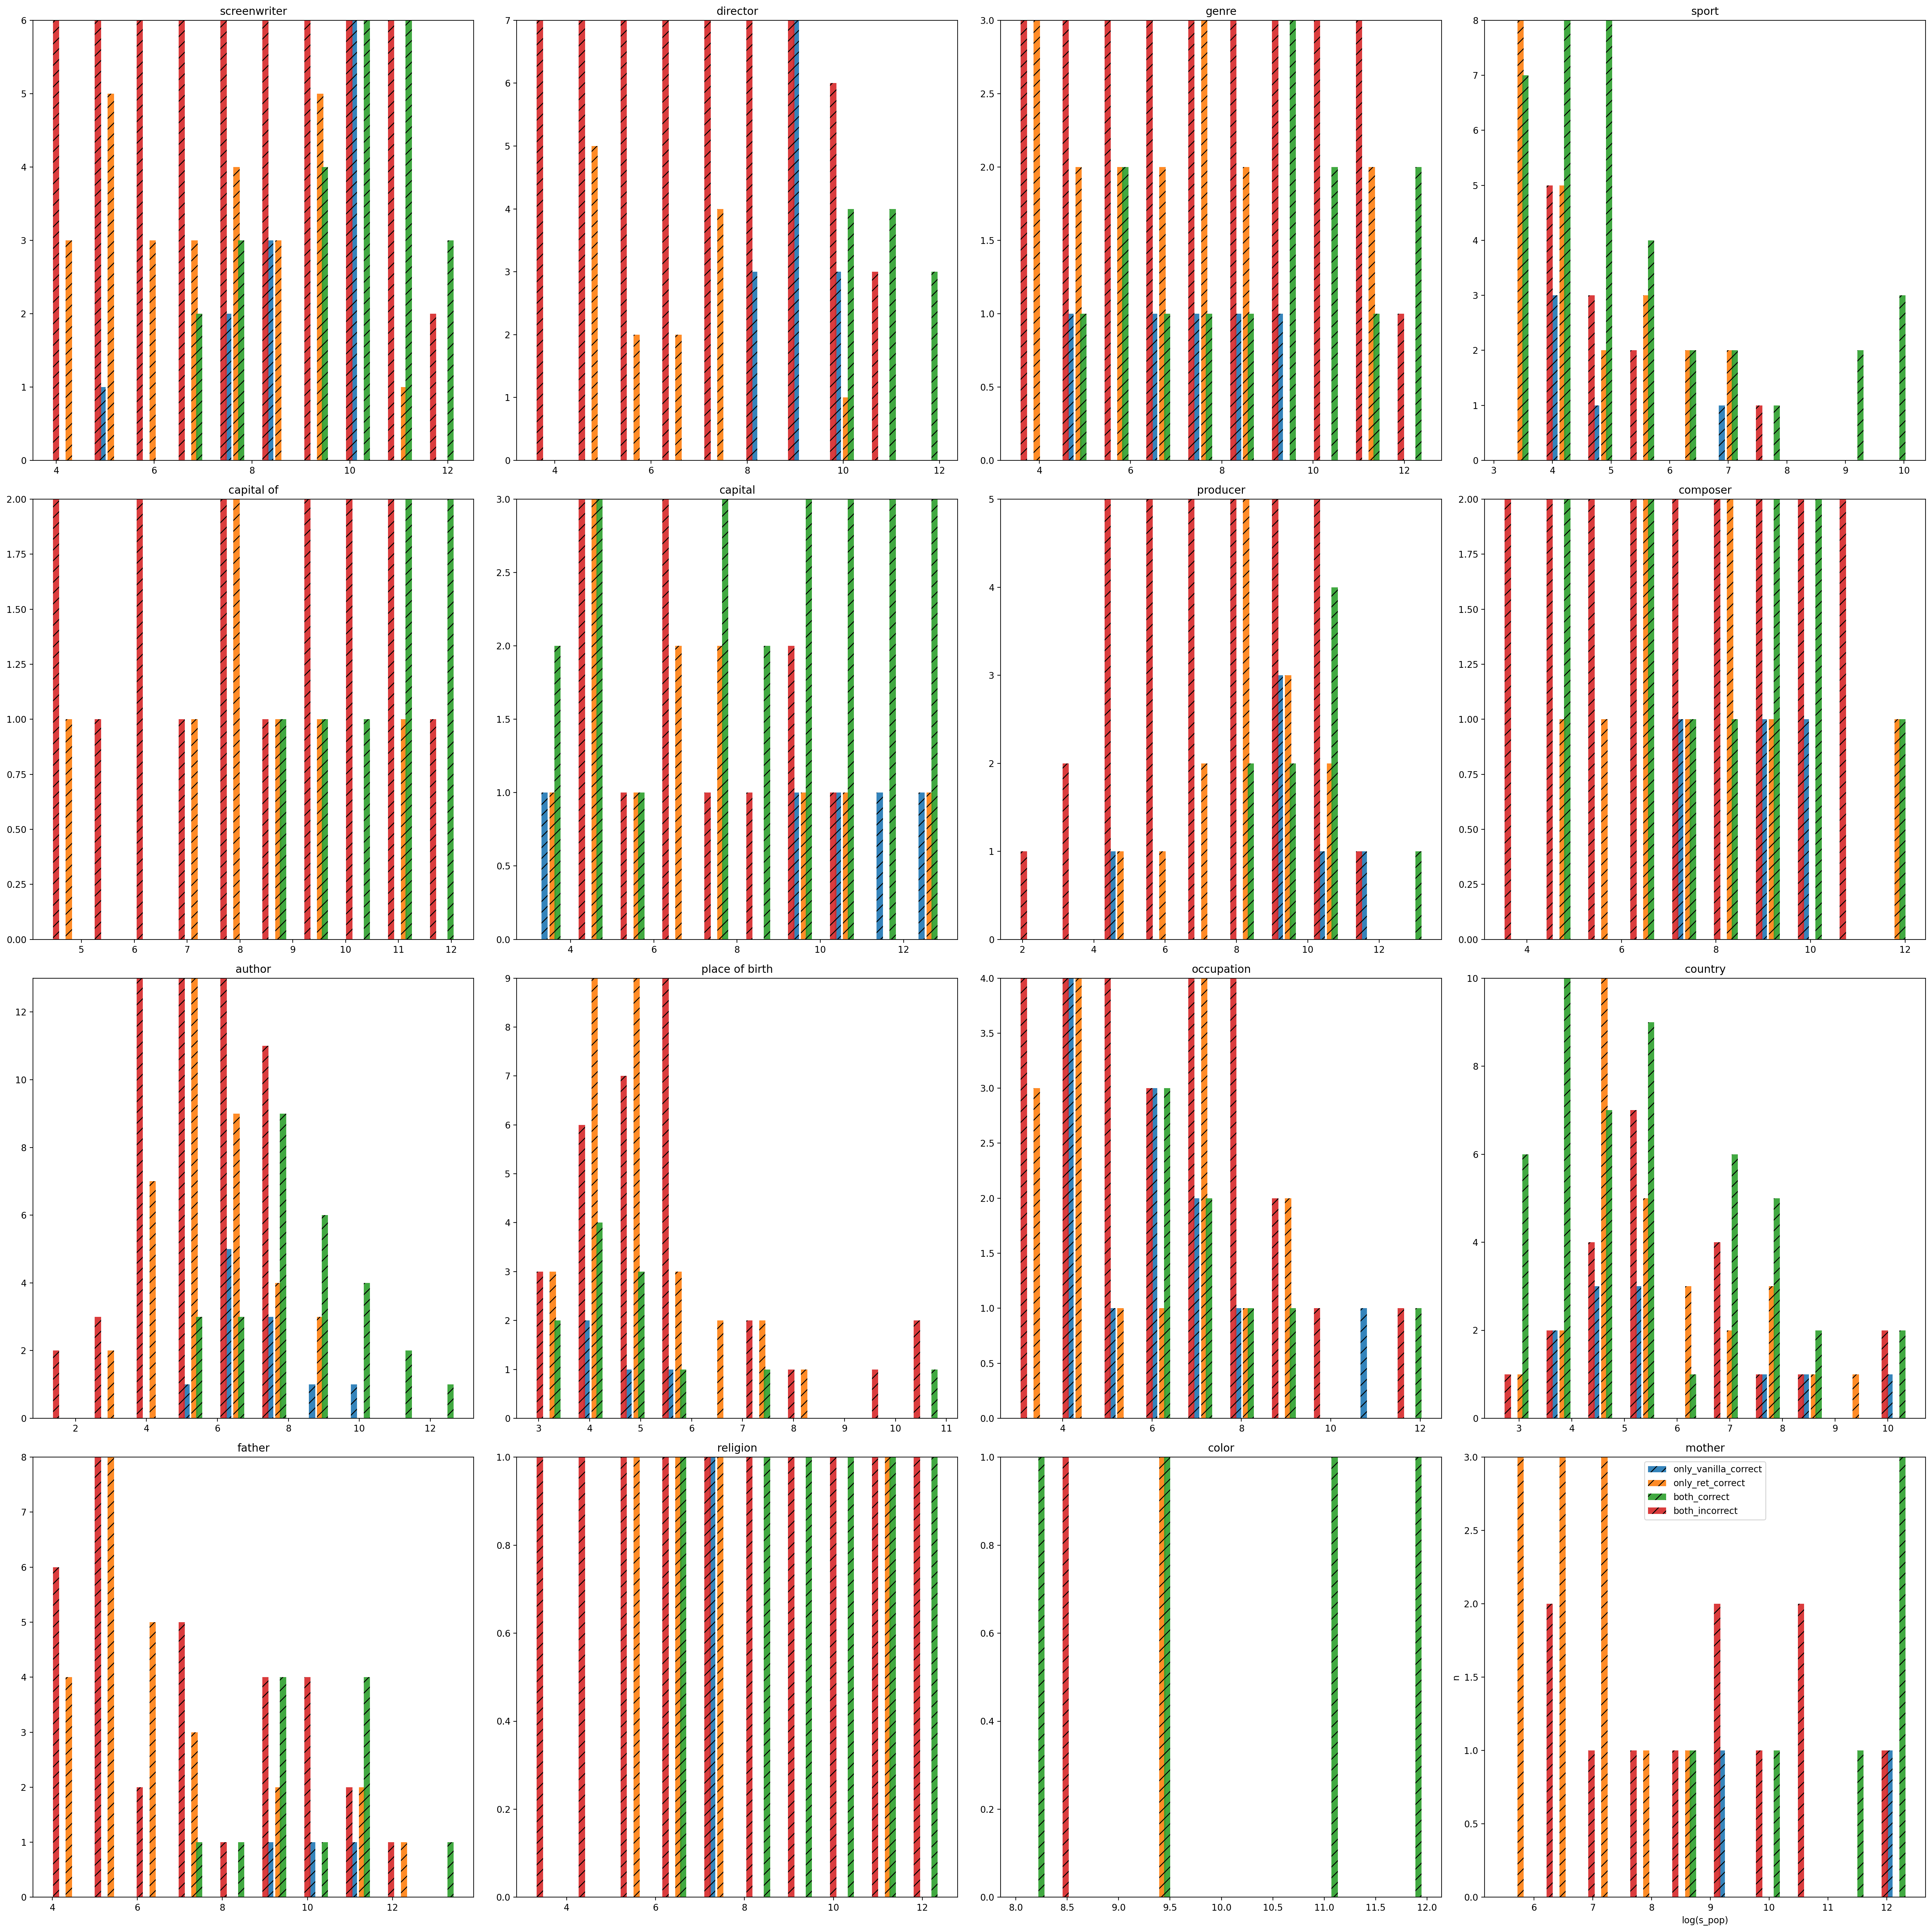

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


print("plot_spop")
result = pd.read_csv(result_path)
props = result.prop.unique()
plt.figure(dpi=200, figsize=(30, 30))
for i, prop in enumerate(props):
    plt.subplot(4, 4, i+1)
    prop_result = result[result.prop == prop].copy() # 特定のpropのみ抽出
    #print(f'{prop} : {len(prop_result)}')

    log_pop = np.log(prop_result["s_pop"].values)
    prop_result["log_pop"] = log_pop
    ser = log_pop
    _, bin_edges = np.histogram(ser) # 人気度の範囲
    width = 0.15*(bin_edges[1] - bin_edges[0])

    # 中間データ
    vanilla_inc = prop_result[~prop_result.is_correct].copy()
    vanilla_c = prop_result[prop_result.is_correct].copy()

    # 各クラスタのデータを抽出
    both_inc = vanilla_inc[~vanilla_inc.ret_is_correct].copy()
    only_vanilla_c = vanilla_c[~vanilla_c.ret_is_correct].copy()
    only_ret_c = vanilla_inc[vanilla_inc.ret_is_correct].copy()
    both_c = vanilla_c[vanilla_c.ret_is_correct].copy()

    hist_both_inc, _ = np.histogram(both_inc["log_pop"], bins=bin_edges)
    hist_only_vanilla_c, _ = np.histogram(only_vanilla_c["log_pop"], bins=bin_edges)
    hist_only_ret_c, _ = np.histogram(only_ret_c["log_pop"], bins=bin_edges)
    hist_both_c, _ = np.histogram(both_c["log_pop"], bins=bin_edges)

    # ブルーバー：vanilla 縦軸が正解率、横軸が人気度の対数
    plt.bar(bin_edges[:-1] - 0.65 * width, hist_only_vanilla_c, width=width, alpha=0.9, label="only_vanilla_correct", align='edge', hatch='//')
    plt.bar(bin_edges[:-1] + 0.65 * width, hist_only_ret_c, width=width, alpha=0.9, label="only_ret_correct", align='edge', hatch='//')
    plt.bar(bin_edges[:-1] + 1.4 * width, hist_both_c, width=width, alpha=0.9, label="both_correct", align='edge', hatch='//')
    plt.bar(bin_edges[:-1] - 1.4 * width, hist_both_inc, width=width, alpha=0.9, label="both_incorrect", align='edge', hatch='//')
    plt.title(f"{prop}")
    plt.ylim([0,max(max(hist_only_vanilla_c), max(hist_only_ret_c))])
plt.xlabel("log(s_pop)")
plt.ylabel("n")
plt.legend()
plt.tight_layout()
plt.show()